In [1]:
using Distributions
using Plots

In [2]:
prediction(Xtilde, weights) = Xtilde * weights

gradients(Xtilde, P, T) = 1/size(Xtilde)[1] * transpose(Xtilde) * (P - T)

function cost(Xtilde, P, T)
    array = P .- T
    cost = 1/(2*size(Xtilde)[1]) * array'array
end

cost (generic function with 1 method)

In [3]:
ns = 10
X = sort(rand(ns))
Xtilde = ones(ns, 2)
Xtilde[:, 1] = X
T = 2 .* X .+ 1
Y = T .+ rand.(Normal(0, 0.2))

10-element Array{Float64,1}:
 1.1932208311143595
 1.131704698964782 
 1.8883036011142886
 1.9126670113689423
 1.6177330007472364
 1.8898298017625976
 1.6506757973770831
 2.206893514320382 
 2.122792963540313 
 2.4466029623879404

┌ Warning: Skipped marker arg o.
└ @ Plots /home/yuanyi/.julia/packages/Plots/Ufx0i/src/args.jl:744


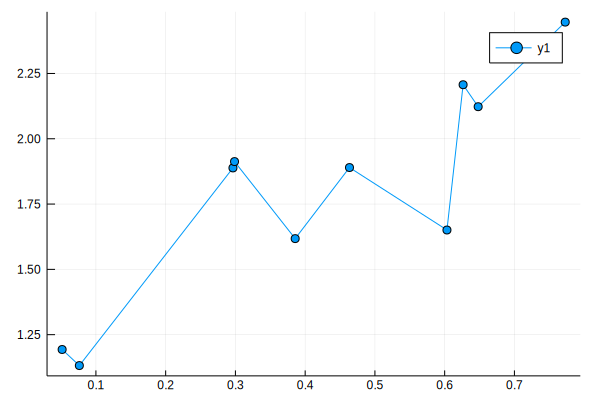

In [4]:
plot(X, Y, m = "o")

In [5]:
nu = 100
C = zeros(nu)
# a = 0.1
w = zeros(nu+1, 2)
w[1, :] = [0.1, 0.2]

graddesc = @animate for i = 1:nu
    a = exp(0.0005*i)
    P = prediction(Xtilde, w[i, :])
    grads = gradients(Xtilde, P, T)
    C[i] = cost(Xtilde, P, T)
    w[i+1, :] = w[i, :] - a * grads
    plot(X, P, legend = :bottomright, ylims = (1, maximum(Y)+0.5))
    scatter!(X, Y)
    plot!(X, T)
#     scatter!(1/nu)
end

Animation("/tmp/tmpx63zQi", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000091.png", "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png"])

In [6]:
gif(graddesc, "./graddesc.gif", fps = 30)

┌ Info: Saved animation to 
│   fn = /home/yuanyi/Documents/MA930/graddesc.gif
└ @ Plots /home/yuanyi/.julia/packages/Plots/Ufx0i/src/animation.jl:90


Plots.AnimatedGif("/home/yuanyi/Documents/MA930/graddesc.gif")

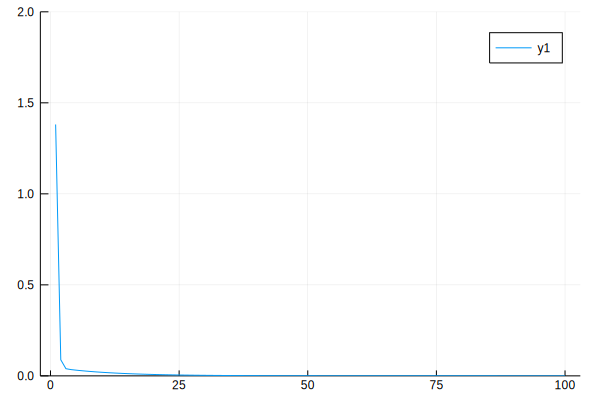

In [7]:
plot(1:100, C, ylims = (0, 2))

In [8]:
plot(X, P, legend = :bottomright)
scatter!(X, Y)
plot!(X, T)
# legends(loc = :bottomright)

UndefVarError: UndefVarError: P not defined

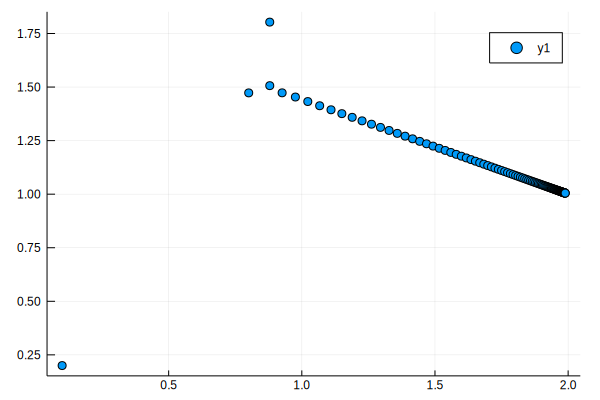

In [9]:
scatter(w[:, 1], w[:, 2])

In [10]:
w[100, :]

2-element Array{Float64,1}:
 1.9885475321561816
 1.0050665122013365

In [11]:
a

UndefVarError: UndefVarError: a not defined

In [12]:
a = exp(0.0005*nu)

1.0512710963760241